# Training a Multilayer Neural Network using Backpropagation
### Application to the MNIST dataset, Part (h)

YJ Choe (yjchoe@cmu.edu)

##### Continued from `nn_mnist.ipynb`.

#### Setup

In [1]:
%cd ../backprop/

/Users/YJ/Code/deep_learning/hw1/code/backprop


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from nn import NN
from utils import load_data, standardize_data
from visualization import print_image

#### Load and standardize data

In [3]:
X_train, X_valid, X_test, y_train, y_valid, y_test = \
    load_data('../../data/digitstrain.txt',
              '../../data/digitsvalid.txt',
              '../../data/digitstest.txt')

In [4]:
X_train.shape, y_train.shape

((3000, 784), (3000, 10))

In [5]:
scaler  = standardize_data(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test )
np.round([X_train.mean(axis=0).max(), X_train.std(axis=0).max()], 5)  # [0., 1.]

array([ 0.,  1.])

## (g) Best performance two-hidden-layer network

We first train a two-hidden-layer neural network with heuristically chosen hyperparameters.

In [6]:
nn = NN(architecture=[784, 100, 100, 10], 
        activation='sigmoid', learning_rate=1.0, momentum=0.7,
        weight_decay=1e-4, dropout=0.5, early_stopping=False,
        seed=412)

In [7]:
for l in nn.layers:
    print l.__name__

layer0
layer1
output_layer


Next, we train on the full training data.

In [10]:
nn = NN(architecture=[784, 100, 100, 10], 
        activation='sigmoid', learning_rate=1.0, momentum=0.7,
        weight_decay=1e-4, dropout=0.5, early_stopping=False,
        seed=412)

In [11]:
n_epoch = 200
nn.train(X_train, y_train, X_valid, y_valid,
         batch_size=200, n_epoch=n_epoch, batch_seed=25, 
         verbose=True)
None

|-------|---------------------------|---------------------------|
| Epoch |         Training          |         Validation        |
|-------|---------------------------|---------------------------|
|   #   |    Error    |  Cross-Ent  |    Error    |  Cross-Ent  |
|-------|---------------------------|---------------------------|
|    1  |   0.55567   |   0.19088   |   0.55900   |   0.19216   |
|    2  |   0.21033   |   0.10250   |   0.23400   |   0.10671   |
|    3  |   0.28800   |   0.10176   |   0.32200   |   0.10703   |
|    4  |   0.48533   |   0.15952   |   0.49400   |   0.16241   |
|    5  |   0.26867   |   0.08766   |   0.29900   |   0.09636   |
|    6  |   0.20633   |   0.07140   |   0.24500   |   0.08268   |
|    7  |   0.16667   |   0.06223   |   0.19900   |   0.07357   |
|    8  |   0.22467   |   0.06947   |   0.24500   |   0.07669   |
|    9  |   0.19167   |   0.06519   |   0.22500   |   0.07105   |
|   10  |   0.19900   |   0.06556   |   0.22600   |   0.07130   |
|   11  | 

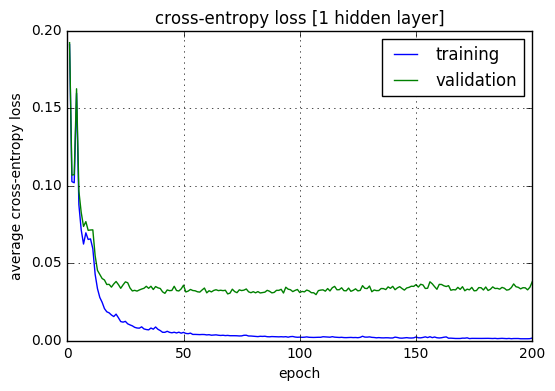

In [12]:
plt.grid()
plt.plot(*zip(*nn.training_loss), label='training')
plt.plot(*zip(*nn.validation_loss), label='validation')
plt.title('cross-entropy loss [1 hidden layer]')
plt.xlabel('epoch')
plt.ylabel('average cross-entropy loss')
plt.legend()
plt.show()

The two-hidden-layer network starts at a higher validation loss and fluctuates a bit more during the first few epochs, but soon it achieves a (slightly) lower loss than the single-hidden-layer loss. It looks like early-stopping at around 100 epochs would have been enough (we didn't use the early stopping rule here).

#### Cross-Validation

Since searching over the grid of many hyperparameters is even more difficult in two-hidden-layer networks than one, we cross-validate over a smaller subset of hyperparameters that we learned could be reasonable choices.

In [13]:
import itertools as it

lrs      = [0.5, 1.0]
betas    = [0.33, 0.66]
n_units  = [(100, 50), (200, 100), (200, 200)]
earlys   = [True]
decays   = [1e-5, 1e-4]
dropouts = [0.5]

nns      = []
for i, (lr, beta, (n_unit1, n_unit2), early, decay, dropout) in \
    enumerate(it.product(lrs, betas, n_units, earlys, decays, dropouts)):
    nn0 = NN(architecture=[784, n_unit1, n_unit2, 10], 
             activation='sigmoid', learning_rate=lr, momentum=beta,
             weight_decay=decay, dropout=dropout, early_stopping=early, 
             seed=412)
    nn0.train(X_train, y_train, X_valid, y_valid,
              batch_size=200, n_epoch=n_epoch, batch_seed=25,
              verbose=False)  # silent run
    nns.append(nn0)
    print('NN #{:d} Hyperparameters: {:.1f}, {:.1f}, ({:d}, {:d}), {:d}, {:.4f}, {:.1f}'\
          .format(i+1, lr, beta, n_unit1, n_unit2, int(early), decay, dropout))
    print('training complete ({:d} epochs)'.format(n_epoch))
    print('Training  : cross-entropy {:.5f}, error {:.5f}'\
          .format(nn0.training_loss[-1][1], nn0.training_error[-1][1]))
    print('Validation: cross-entropy {:.5f}, error {:.5f}'\
          .format(nn0.validation_loss[-1][1], nn0.validation_error[-1][1]))

======Early stopping: validation loss increase at epoch  49======
NN #1 Hyperparameters: 0.5, 0.3, (100, 50), 1, 0.0000, 0.5
training complete (200 epochs)
Training  : cross-entropy 0.01315, error 0.03333
Validation: cross-entropy 0.03842, error 0.11000
======Early stopping: validation loss increase at epoch  49======
NN #2 Hyperparameters: 0.5, 0.3, (100, 50), 1, 0.0001, 0.5
training complete (200 epochs)
Training  : cross-entropy 0.01411, error 0.03500
Validation: cross-entropy 0.03827, error 0.11100
======Early stopping: validation loss increase at epoch  41======
NN #3 Hyperparameters: 0.5, 0.3, (200, 100), 1, 0.0000, 0.5
training complete (200 epochs)
Training  : cross-entropy 0.00982, error 0.02333
Validation: cross-entropy 0.03360, error 0.09900
======Early stopping: validation loss increase at epoch  42======
NN #4 Hyperparameters: 0.5, 0.3, (200, 100), 1, 0.0001, 0.5
training complete (200 epochs)
Training  : cross-entropy 0.01027, error 0.02533
Validation: cross-entropy 0.033

Based on this result, we choose the best model (#24), in both validation cross-entropy loss and error rate. Since it early-stopped at epoch 40, we look at the training curve to see if we can benefit further.

In [15]:
nn = NN(architecture=[784, n_unit1, n_unit2, 10], 
        activation='sigmoid', learning_rate=lr, momentum=beta,
        weight_decay=decay, dropout=dropout, early_stopping=False, 
        seed=412)
nn.train(X_train, y_train, X_valid, y_valid,
         batch_size=200, n_epoch=n_epoch, batch_seed=25,
         verbose=True)  # silent run

|-------|---------------------------|---------------------------|
| Epoch |         Training          |         Validation        |
|-------|---------------------------|---------------------------|
|   #   |    Error    |  Cross-Ent  |    Error    |  Cross-Ent  |
|-------|---------------------------|---------------------------|
|    1  |   0.57800   |   0.18100   |   0.60100   |   0.18256   |
|    2  |   0.21633   |   0.08787   |   0.25500   |   0.09095   |
|    3  |   0.26500   |   0.07852   |   0.27900   |   0.08828   |
|    4  |   0.15700   |   0.05916   |   0.17500   |   0.06755   |
|    5  |   0.13833   |   0.05933   |   0.17200   |   0.06757   |
|    6  |   0.12333   |   0.03954   |   0.15800   |   0.04905   |
|    7  |   0.09100   |   0.03218   |   0.14100   |   0.04705   |
|    8  |   0.06600   |   0.02310   |   0.12000   |   0.03947   |
|    9  |   0.06233   |   0.02113   |   0.12600   |   0.04047   |
|   10  |   0.04467   |   0.01686   |   0.11400   |   0.03730   |
|   11  | 

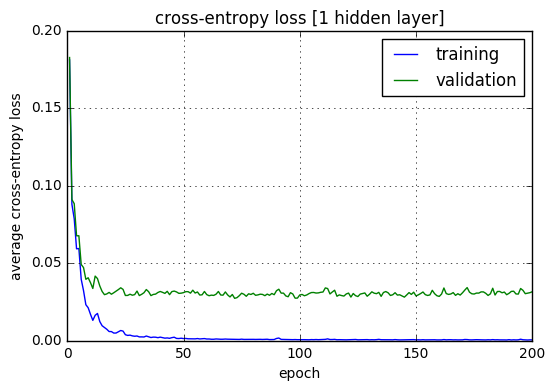

In [16]:
plt.grid()
plt.plot(*zip(*nn.training_loss), label='training')
plt.plot(*zip(*nn.validation_loss), label='validation')
plt.title('cross-entropy loss [1 hidden layer]')
plt.xlabel('epoch')
plt.ylabel('average cross-entropy loss')
plt.legend()
plt.show()

Based on this result, we conclude that the early stopping around epoch 40 achieved the validation error where it stabilized afterwards. We now use this model to fit the all three datasets:

In [21]:
train_loss  = nn.compute_cross_entropy(X_train, y_train)
train_error = nn.compute_error(X_train, y_train)
valid_loss  = nn.compute_cross_entropy(X_valid, y_valid)
valid_error = nn.compute_error(X_valid, y_valid)
test_loss   = nn.compute_cross_entropy(X_test, y_test)
test_error  = nn.compute_error(X_test, y_test)

In [22]:
print('NN #{:d} Hyperparameters: {:.1f}, {:.1f}, ({:d}, {:d}), {:d}, {:.4f}, {:.1f}'\
      .format(i+1, lr, beta, n_unit1, n_unit2, int(early), decay, dropout))
print('Training  : cross-entropy {:.5f}, error rate {:.5f}'\
      .format(train_loss, train_error))
print('Validation: cross-entropy {:.5f}, error rate {:.5f}'\
      .format(valid_loss, valid_error))
print('Testing   : cross-entropy {:.5f}, error rate {:.5f}'\
      .format(test_loss , test_error ))

NN #24 Hyperparameters: 1.0, 0.7, (200, 200), 1, 0.0001, 0.5
Training  : cross-entropy 0.00037, error rate 0.00000
Validation: cross-entropy 0.03146, error rate 0.08800
Testing   : cross-entropy 0.04236, error rate 0.10933


We get approximately 10.9% test error rate. The following is a visualization of the first hidden layer weights:

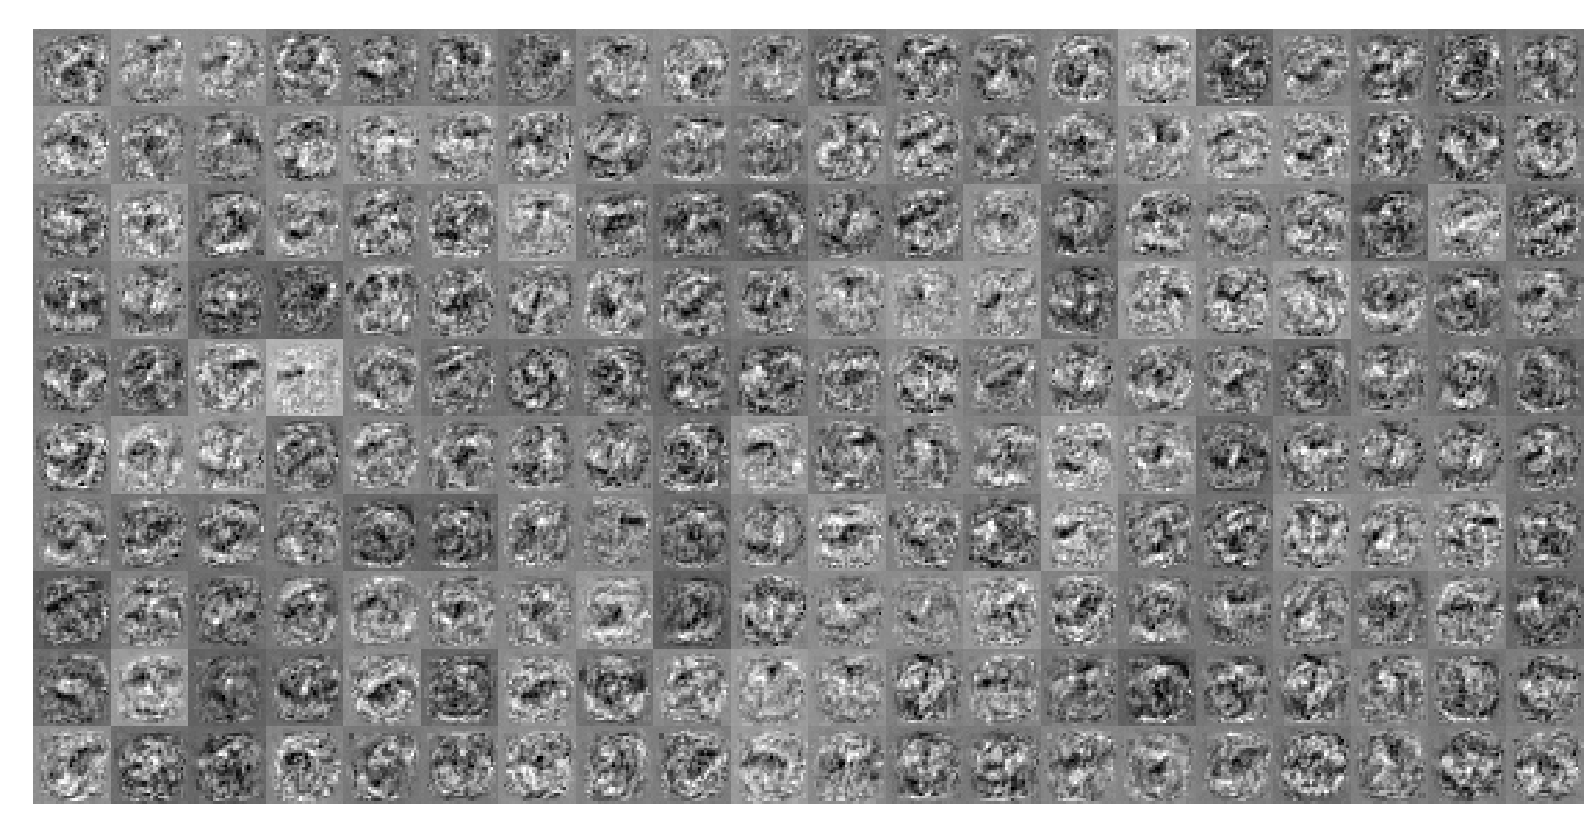

In [23]:
assert nn.layers[0].W.shape[0] >= 100
print_image(nn.layers[0].W, output_shape=(10, 20))
None

All of the filters have separated out the borders and are focusing on the central part where there are digits. The quality of filters seem to be similar to that of the one-hidden-layer filters. While it isn't as easy to make sense of all these filters, we can observe that, again, there are contrasts within each filter that forms an edge detector. It seems that many of them have unique shapes as well.

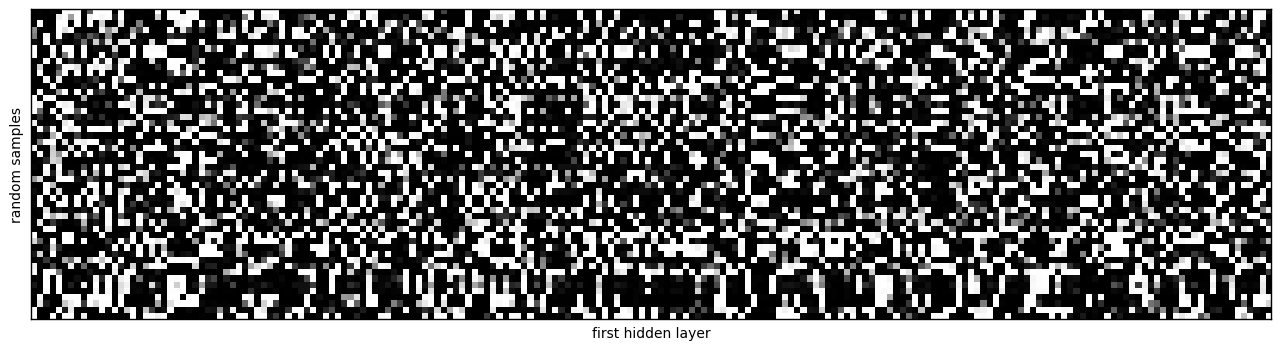

In [24]:
rng    = np.random.RandomState(1)
subset = rng.choice(np.arange(X_train.shape[0]), 50, replace=False)

h = nn.layers[0].fprop(X_train[subset, :])
plt.matshow(h)
plt.xlabel('first hidden layer')
plt.ylabel('random samples')
plt.xticks([])
plt.yticks([])
None

The first hidden layer units are also reasonably sparse, especially after dropout and weight decay. While there seems to be a few sets of columns that look a bit correlated, overall the columns don't entirely overlap. It seems that many units have been separated, but given the limited set of cross-validation and tools we can certainly hope to achieve better results by further cross-validation to choose larger capacity with the appropriate learning rates.